In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
drop_cols=['RowNumber','Surname','CustomerId']
df = df.drop(drop_cols,axis=1)

(array([[  95.,  232.,  201.,  213.,  203.,  209.,  196.,  177.,  197.,
          314.],
        [ 318.,  803.,  847.,  796.,  786.,  803.,  771.,  851.,  828.,
         1160.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 BarContainer objects>)

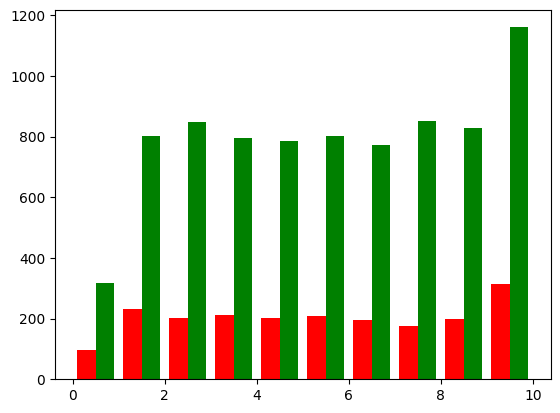

In [5]:
exited = df[df['Exited']==1]['Tenure']
not_exited = df[df['Exited']==0]['Tenure']
plt.hist([exited,not_exited],color=['red','green'])

(array([[4.600e+01, 1.670e+02, 4.730e+02, 5.620e+02, 4.470e+02, 2.690e+02,
         5.800e+01, 1.400e+01, 1.000e+00, 0.000e+00],
        [5.650e+02, 2.012e+03, 3.156e+03, 1.309e+03, 3.810e+02, 2.540e+02,
         1.500e+02, 1.130e+02, 1.900e+01, 4.000e+00]]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 2 BarContainer objects>)

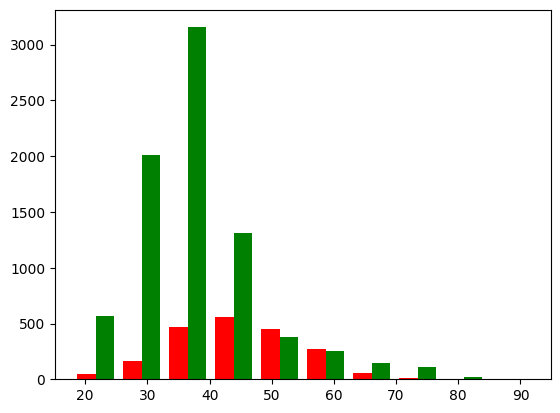

In [6]:
exited = df[df['Exited']==1]['Age']
not_exited = df[df['Exited']==0]['Age']
plt.hist([exited,not_exited],color=['red','green'])

In [8]:
Geography = pd.get_dummies(df['Geography'],drop_first=True)
Gender = pd.get_dummies(df['Gender'],drop_first=True)
df = pd.concat([df,Geography,Gender],axis=1)

In [9]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'France', 'Germany', 'Spain', 'Female', 'Male', 'Germany',
       'Spain', 'Male'],
      dtype='object')

In [18]:
x = df[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Male','Germany','Spain']]
y = df['Exited']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [29]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
Classifier = Sequential()
Classifier.add(Dense(units=64,input_dim=x_train.shape[1],activation='relu'))
Classifier.add(Dense(units=32,activation='relu'))
Classifier.add(Dense(units=1,activation='sigmoid'))
Classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                960       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
Classifier.fit(x_train,y_train,epochs=50,batch_size=32) 

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 0.4559 - accuracy: 0.8019
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8340
Epoch 3/50
219/219 [==============================] - 1s 2ms/step - loss: 0.3627 - accuracy: 0.8504
Epoch 4/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3486 - accuracy: 0.8553
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3416 - accuracy: 0.8577
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3384 - accuracy: 0.8591
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3358 - accuracy: 0.8601
Epoch 8/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3317 - accuracy: 0.8619
Epoch 9/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3289 - accuracy: 0.8600
Epoch 10/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3265 - accuracy: 0.8639

In [31]:
y_pred = Classifier.predict(x_test)

94/94 [==============================] - 0s 2ms/step


In [32]:
y_pred = (y_pred>0.5)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8573333333333333
[[2267  149]
 [ 279  305]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2416
           1       0.67      0.52      0.59       584

    accuracy                           0.86      3000
   macro avg       0.78      0.73      0.75      3000
weighted avg       0.85      0.86      0.85      3000

